**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import sympy as sm
import ipywidgets as widgets
from types import SimpleNamespace

%load_ext autoreload 
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# parameter values
par = SimpleNamespace()
par.alpha = 0.5
par.kappa = 1.0
par.nu = 1/(2*16**2)
par.w = 1.0
par.tau = 0.3

In [3]:
# create utility function
def V(L,G):
    C = par.kappa+(1-par.tau)*par.w*L
    utility = np.log(C**(par.alpha)*G**(1-par.alpha))-(par.nu*L**2)/2
    return utility

# create numerical optimization
def optimal_L(G):
    obj = lambda L:-V(L,G)
    guess = 0.5
    bounds = [(0,24)] # ensures labor does not go abvoe 24
    result = optimize.minimize(obj,guess,bounds=bounds)
    optimal = result.x[0]
    return optimal

# create optimal labor supply function
def Lstar(w):
    value = (-par.kappa+np.sqrt(par.kappa**2+4*par.alpha/par.nu*((1-par.tau)*w)**2))/(2*(1-par.tau)*w)
    if value < 24:
        return value
    elif value >=24: # ensures work does not exceed 24 hours
        return 24
print(f'L (numerical, G=1) = {optimal_L(G=1):.5}')
print(f'L (numerical, G=2) = {optimal_L(G=2):.5}')
print(f'L (analytical)= {Lstar(w=1.0):.5}')

L (numerical, G=1) = 15.302
L (numerical, G=2) = 15.302
L (analytical)= 15.302


We can see, that the results for optimal L from the numerical solutions, are in line with the results for both G=1 and G=2.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

C:\Users\frede\AppData\Local\Temp\ipykernel_18916\2677106987.py:18: RuntimeWarning: invalid value encountered in double_scalars
  value = (-par.kappa+np.sqrt(par.kappa**2+4*par.alpha/par.nu*((1-par.tau)*w)**2))/(2*(1-par.tau)*w)


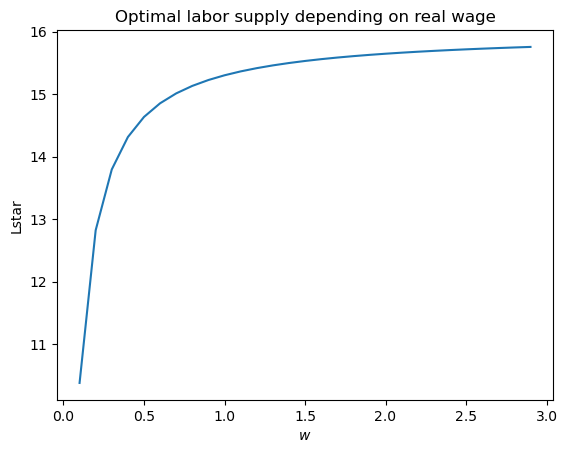

In [4]:
# create empty list to store Lstar values
Lstar_values = []
w_values = np.arange(0,3,0.1)

# run loop to add values to list for the plot
for w in w_values:
    value = Lstar(w)
    Lstar_values.append(value)

plt.figure()
plt.title("Optimal labor supply depending on real wage")
plt.ylabel("Lstar")
plt.xlabel("$w$")
plt.plot(w_values, Lstar_values)
plt.show()

From this we see, that as real wage increase, the optimal labor supply choice also increase while it looks to converge to 16 hours.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


C:\Users\frede\AppData\Local\Temp\ipykernel_18916\215444419.py:6: RuntimeWarning: divide by zero encountered in log
  utility = np.log(C**(par.alpha)*G**(1-par.alpha))-(par.nu*L**2)/2


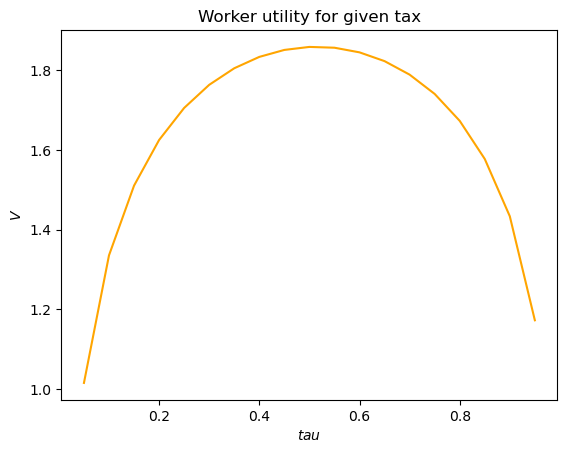

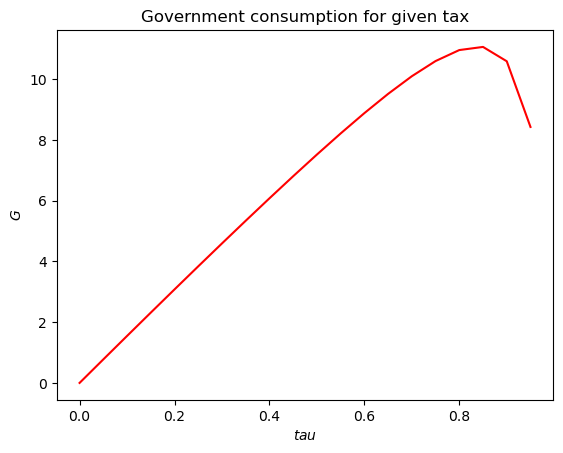

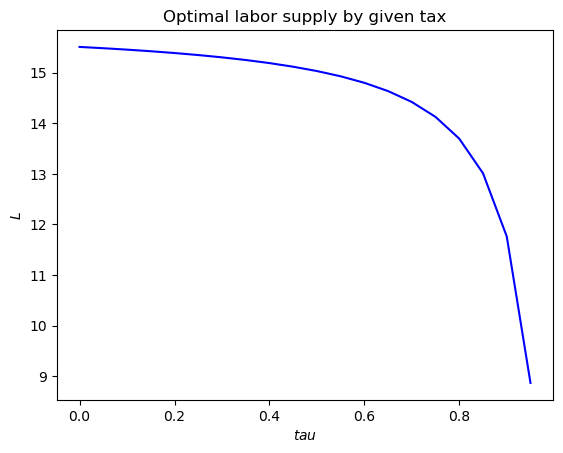

In [5]:
# create new utility function by inserting the G equation and the optimal L equation
def tax_V(tau):
    L = (-par.kappa+np.sqrt(par.kappa**2+4*par.alpha/par.nu*((1-tau)*par.w)**2))/(2*(1-tau)*par.w)
    G = tau*par.w*L
    C = par.kappa+(1-tau)*par.w*L
    utility = np.log(C**(par.alpha)*G**(1-par.alpha))-(par.nu*L**2)/2
    return utility,G,L

t_values = np.arange(0,1,0.05)
V_list = []
G_list = []
L_list = []
for tau in t_values:
    V = tax_V(tau)[0]
    V_list.append(V)

for tau in t_values:
    G = tax_V(tau)[1]
    G_list.append(G)

for tau in t_values:
    L = tax_V(tau)[2]
    L_list.append(L)

plt.figure()
plt.title("Worker utility for given tax")
plt.ylabel("$V$")
plt.xlabel("$tau$")
plt.plot(t_values,V_list, color="orange")

plt.figure()
plt.title("Government consumption for given tax")
plt.ylabel("$G$")
plt.xlabel("$tau$")
plt.plot(t_values,G_list, color="red")

plt.figure()
plt.title("Optimal labor supply by given tax")
plt.ylabel("$L$")
plt.xlabel("$tau$")
plt.plot(t_values,L_list, color="blue")
plt.show()

From the graphs you can see, that a tax increase decreases labor supply, while government consumption increase at the start until the fewer labor hours start affecting the total too much.

From the utility graph we see an optimal tax around 0.5.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

optimal tax = 0.515
optimal utility = 1.86


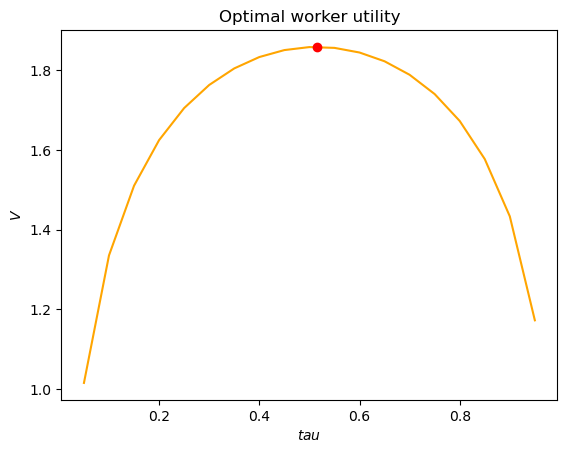

In [6]:
# define a function to optimize the tax
def optimal_tax():
    obj = lambda tau:-tax_V(tau)[0]
    guess = 0.5
    result = optimize.minimize(obj,guess)
    optimal = result.x[0]
    return optimal

print(f'optimal tax = {optimal_tax():.3}')
print(f'optimal utility = {tax_V(optimal_tax())[0]:.3}')

plt.figure()
plt.scatter(optimal_tax(),tax_V(optimal_tax())[0], color="red", zorder=5)
plt.title("Optimal worker utility")
plt.ylabel("$V$")
plt.xlabel("$tau$")
plt.plot(t_values,V_list, color="orange")
plt.show()


The optimal tax is then $\tau=0.515$ with a utility of $V=1.86$

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [7]:
# setting the tax rate to the optimal found in Q4 and adding the new parameters
par.sigma = 1.001
par.rho = 1.001
par.epsilon = 1.0
par.tau=optimal_tax()

def new_V(L,G):
    C = par.kappa+(1-par.tau)*par.w*L
    utility = (((par.alpha*C**((par.sigma-1)/par.sigma)+(1+par.alpha)*G**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1)))**(1-par.rho)-1)/(1-par.rho)-par.nu*L**(1+par.epsilon)/(1+par.epsilon)
    return utility


# find the optimal L given G
def new_optimal_L(G):
    obj = lambda L:-new_V(L,G=G)
    guess = 0.5
    bounds = [(0,24)] # ensures labor does not go above 24
    result = optimize.minimize(obj,guess, bounds=bounds)
    optimal = result.x[0]
    return optimal

# find the optimal G
def new_optimal_G():
    obj = lambda G: G - (par.tau*par.w*new_optimal_L(G))
    guess = 5
    result = optimize.root(obj,guess) # finds the value of G that makes the objective function 0
    optimal = result.x[0]
    return optimal

print(f'For: Sigma = {par.sigma}, Rho = {par.rho}, Epsilon = {par.epsilon}')
print(f'G = {new_optimal_G():.4}')
# changing parameter values
par.sigma = 1.5
par.rho = 1.5
print(f'For: Sigma = {par.sigma}, Rho = {par.rho}, Epsilon = {par.epsilon}')
print(f'G = {new_optimal_G():.4}')

For: Sigma = 1.001, Rho = 1.001, Epsilon = 1.0
G = 5.0
For: Sigma = 1.5, Rho = 1.5, Epsilon = 1.0
G = 2.362


Given the taxrate found in question 4, I get an optimal G value of $G=5$ for $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.

And an optimal value of $G=2.362$ for $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0$.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [8]:
# reset values
par.sigma = 1.001
par.rho = 1.001

def tax_obj(tau):
    par.tau=tau
    Lstar = new_optimal_L(new_optimal_G())
    Gstar = par.tau*par.w*Lstar
    C = par.kappa+(1-par.tau)*par.w*Lstar
    utility = (((par.alpha*C**((par.sigma-1)/par.sigma)+(1+par.alpha)*Gstar**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1)))**(1-par.rho)-1)/(1-par.rho)-par.nu*Lstar**(1+par.epsilon)/(1+par.epsilon)
    return -utility

def new_optimal_tax():
    guess = 0.5
    bounds = [(0,1)]
    result = optimize.minimize(tax_obj,guess,bounds=bounds)
    optimal = result.x[0]
    return optimal

print(f'For: Sigma = {par.sigma}, Rho = {par.rho}, Epsilon = {par.epsilon}')
print(f'tau = {new_optimal_tax():.3}')
# changing parameter values
par.sigma = 1.5
par.rho = 1.5
print(f'For: Sigma = {par.sigma}, Rho = {par.rho}, Epsilon = {par.epsilon}')
print(f'tau = {new_optimal_tax():.3}')

For: Sigma = 1.001, Rho = 1.001, Epsilon = 1.0


C:\Users\frede\AppData\Local\Temp\ipykernel_18916\1702763763.py:9: RuntimeWarning: invalid value encountered in power
  utility = (((par.alpha*C**((par.sigma-1)/par.sigma)+(1+par.alpha)*G**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1)))**(1-par.rho)-1)/(1-par.rho)-par.nu*L**(1+par.epsilon)/(1+par.epsilon)


tau = 0.5
For: Sigma = 1.5, Rho = 1.5, Epsilon = 1.0
tau = 0.64


 For $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$ we get an optimal tax rate of $\tau=0.5$

And an optimal tax of $\tau=0.64$ for $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0$.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [9]:
# baseline parameter values
par.eta = 0.5
par.w = 1.0

# define profit function
def profits(kappa,l):
    pi = kappa*l**(1-par.eta)-par.w*l
    return pi

# define numerical solution
def num_opt_l(kappa):
    obj = lambda l: -profits(kappa,l)
    guess = 0.5
    result = optimize.minimize(obj,guess)
    optimal = result.x[0]
    return optimal

# define analytical solution
opt_l = lambda kappa: ((1-par.eta)*kappa/par.w)**(1/par.eta)

print("for kappa = 1:")
print(f'analytical: l = {opt_l(1)}, numerical:{num_opt_l(1):.5}')
print("for kappa = 2:")
print(f'analytical: l = {opt_l(2)}, numerical:{num_opt_l(2):.5}')

for kappa = 1:
analytical: l = 0.25, numerical:0.25
for kappa = 2:
analytical: l = 1.0, numerical:1.0


As the optimal $\ell$ values are the same for the numerical and analytical solution for both $\kappa=1$ and $\kappa=2$, we have verified that the function maximizes profits.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [10]:
# set parameter values
par.rho = 0.9
par. iota = 0.01
par.sigma_epsilon = 0.1
par.R = (1+0.01)**(1/12)

# set seed and generate random normal distribution
np.random.seed(2023)
size = 120 # number of periods for each h
K = 1000 # number of simulations of h

# create empty list with h values for each simulation to append
h_values = []

# simulate the model K times
for _ in range(K):
    # generate epsilon values
    epsilon = np.random.normal(loc=-0.5*par.sigma_epsilon**2, scale=par.sigma_epsilon, size=size)
    # store each value of kappa for the AR(1)
    kappa_series = np.zeros(120)
    kappa_series[0] = 1.0 # initial kappa
    for t in range(1,120): # isolate kappa in period t by taking e on both sides
        kappa_series[t] = np.exp(par.rho*np.log(kappa_series[t-1])+epsilon[t])

    h = 0.0
    for t in range(120):
        kappa = kappa_series[t]
        kappa_prev = kappa_series[t-1]
        h += par.R**-t*(kappa*opt_l(kappa)**(1-par.eta)-par.w*opt_l(kappa)-int(t > 0 and opt_l(kappa) != opt_l(kappa_prev)) * par.iota)

    h_values.append(h)

# Calculate H as the average of value functions
H = np.mean(h_values)
print(f'H = {H:.4}')


H = 27.87


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.


**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [11]:
par.delta = 0.05
# change the definition of l_opt to fit the new policy
def new_l_opt(kappa,l_prev):
    lstar = ((1-par.eta)*kappa/par.w)**(1/par.eta)
    if abs(l_prev-lstar) > par.delta:
        return lstar
    else:
        return l_prev

# create empty list with h values for each simulation to append
h_values = []

for _ in range(K):
    # generate epsilon values
    epsilon = np.random.normal(loc=-0.5 * par.sigma_epsilon**2, scale=par.sigma_epsilon, size=size)
    # store each value of kappa for the AR(1)
    kappa_series = np.zeros(120)
    kappa_series[0] = 1.0  # initial kappa
    for t in range(1, 120):  # isolate kappa in period t by taking e on both sides
        kappa_series[t] = np.exp(par.rho * np.log(kappa_series[t - 1]) + epsilon[t])

    l_prev = 0.0  # initial labor at t = -1
    h = 0.0 # start value for h before looping
    for t in range(120):
        kappa = kappa_series[t]
        l = new_l_opt(kappa, l_prev)
        h += par.R**-t * (kappa * l**(1 - par.eta) - par.w * l - int(t>0 and l != l_prev)*par.iota)
        l_prev = l
    
    h_values.append(h)

# Calculate H as the average of value functions
H = np.mean(h_values)
print(f'H = {H:.4}')

H = 28.24


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

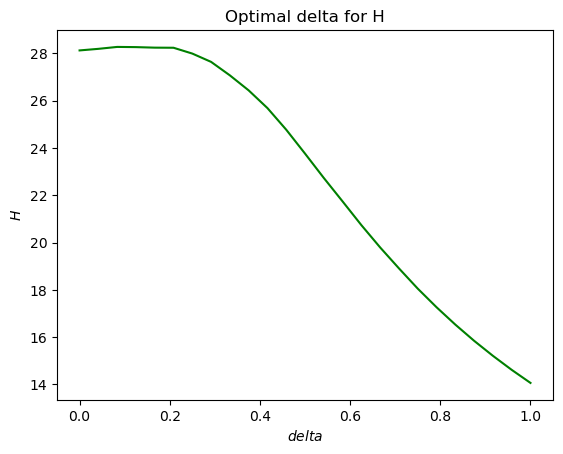

optimal delta: 0.083, H = 28.28


In [12]:
delta_range = np.linspace(0,1,25)
H_list = []

for delta in delta_range:
    par.delta = delta
    for _ in range(K):
        # generate epsilon values
        epsilon = np.random.normal(loc=-0.5 * par.sigma_epsilon**2, scale=par.sigma_epsilon, size=size)
        # store each value of kappa for the AR(1)
        kappa_series = np.zeros(120)
        kappa_series[0] = 1.0  # initial kappa
        for t in range(1, 120):  # isolate kappa in period t by taking e on both sides
            kappa_series[t] = np.exp(par.rho * np.log(kappa_series[t - 1]) + epsilon[t])

        l_prev = 0.0  # initial labor at t = -1
        h = 0.0 # start value for h before looping
        for t in range(120):
            kappa = kappa_series[t]
            l = new_l_opt(kappa, l_prev)
            h += par.R**-t * (kappa * l**(1 - par.eta) - par.w * l - int(t>0 and l != l_prev)*par.iota)
            l_prev = l
    
        h_values.append(h)
    H = np.mean(h_values)
    H_list.append(H)

par.delta = 0.05

plt.figure()
plt.title("Optimal delta for H")
plt.ylabel("$H$")
plt.xlabel("$delta$")
plt.plot(delta_range,H_list, color="green")
plt.show()

delta_dict = dict(zip(H_list,delta_range))
maxH = max(delta_dict.keys())
print(f'optimal delta: {delta_dict[maxH]:.2}, H = {maxH:.4}')

**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.

I make an alternative policy where they only change $\ell$ if the demand shock is deveating a lot from the average shock

In [13]:
# change the definition of l_opt to fit the alternative policy
def alt_l_opt(kappa,l_prev,kappa_series):
    lstar = ((1-par.eta)*kappa/par.w)**(1/par.eta)
    if abs(kappa-np.mean(kappa_series)) > 1/16:
        return lstar
    else:
        return l_prev

# create empty list with h values for each simulation to append
h_values = []

for _ in range(K):
    # generate epsilon values
    epsilon = np.random.normal(loc=-0.5 * par.sigma_epsilon**2, scale=par.sigma_epsilon, size=size)
    # store each value of kappa for the AR(1)
    kappa_series = np.zeros(120)
    kappa_series[0] = 1.0  # initial kappa
    for t in range(1, 120):  # isolate kappa in period t by taking e on both sides
        kappa_series[t] = np.exp(par.rho * np.log(kappa_series[t - 1]) + epsilon[t])

    l_prev = 0.0  # initial labor at t = -1
    h = 0.0 # start value for h before looping
    for t in range(120):
        kappa = kappa_series[t]
        l = alt_l_opt(kappa, l_prev, kappa_series)
        h += par.R**-t * (kappa * l**(1 - par.eta) - par.w * l - int(t>0 and l != l_prev)*par.iota)
        l_prev = l
    
    h_values.append(h)

# Calculate H as the average of value functions
H = np.mean(h_values)
print(f'H = {H:.4}')

H = 27.78


As we can see from the H value for the alternative model, the suggested policy did not improve profitability.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [14]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [15]:
K_warmup = 10
K_max = 1000
tolerance = 1e-8
bounds = [-600,600]
np.random.seed(2022)

def ref_global_opt(bounds,tolerance,K_warmup,K_max):
    for k in range(K_max):
        # generate 2 random numbers in the bounds
        x_k = np.random.uniform(low=bounds[0],high=bounds[1],size=2)

        # step B
        if k < K_warmup:
            # initial guess
            x_k0 = x_k
    
        else:
            # step C
            chi_k = 0.50*2/(1+np.exp((k-K_warmup)/100))
            # step D
            x_k0 = chi_k*x_k+(1-chi_k)*xstar
        
        # step E
        result = optimize.minimize(griewank,x_k0,tol=tolerance, method="BFGS")
        xstar_k = result.x
        func = result.fun

        # step F
        if k==0 or func < bestfunc:
            xstar = xstar_k
            bestfunc = func
            # prints out the starting value and every time a new minima is found
            print(f'new best (k = {k:3}): x_k0 = ({x_k0[0]:7.4},{x_k0[1]:7.4}) --> converged at: ({xstar[0]:10.4},{xstar[1]:10.4}), f = {bestfunc:6.3}')
        
        # step G
        if bestfunc < tolerance:
            return xstar

ref_global_opt(bounds,tolerance,K_warmup,K_max)

new best (k =   0): x_k0 = ( -588.8, -1.131) --> converged at: (    -590.3, 6.926e-08), f =   87.2
new best (k =   2): x_k0 = (  222.5, -15.61) --> converged at: (     222.9,    -13.32), f =   12.5
new best (k =   7): x_k0 = ( -158.3, -6.195) --> converged at: (    -160.1,    -4.438), f =   6.42
new best (k =  10): x_k0 = (  66.45, -126.7) --> converged at: (     65.94,    -128.7), f =   5.23
new best (k =  11): x_k0 = ( -87.06,  86.05) --> converged at: (    -84.78,     84.33), f =   3.58
new best (k =  15): x_k0 = ( -5.616, -44.87) --> converged at: (     -6.28,    -44.38), f =  0.503
new best (k =  32): x_k0 = (  21.32,  30.53) --> converged at: (     21.98,     31.07), f =  0.362
new best (k =  50): x_k0 = ( -11.44,  23.22) --> converged at: (     -9.42,     22.19), f =  0.145
new best (k = 161): x_k0 = (  16.18,  9.819) --> converged at: (     18.84,     8.877), f =  0.109
new best (k = 182): x_k0 = ( -18.66, -8.725) --> converged at: (    -18.84,    -8.877), f =  0.109
new best (

array([-2.32589535e-09, -1.44139897e-08])

From the printed results

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [16]:
np.random.seed(2022)
K_warmup = 100
ref_global_opt(bounds,tolerance,K_warmup,K_max)

new best (k =   0): x_k0 = ( -588.8, -1.131) --> converged at: (    -590.3, 6.926e-08), f =   87.2
new best (k =   2): x_k0 = (  222.5, -15.61) --> converged at: (     222.9,    -13.32), f =   12.5
new best (k =   7): x_k0 = ( -158.3, -6.195) --> converged at: (    -160.1,    -4.438), f =   6.42
new best (k =  32): x_k0 = (  55.72,  123.9) --> converged at: (     56.52,     124.3), f =   4.66
new best (k =  50): x_k0 = ( -61.31,  11.51) --> converged at: (    -59.66,     13.32), f =  0.935
new best (k = 161): x_k0 = (  7.844, -7.634) --> converged at: (      6.28,    -8.877), f = 0.0296
new best (k = 289): x_k0 = ( -7.843,  4.506) --> converged at: (     -9.42,     4.438), f = 0.0271
new best (k = 400): x_k0 = (  1.044, -4.104) --> converged at: (      3.14,    -4.438), f = 0.0074
new best (k = 420): x_k0 = (-0.3851,  3.319) --> converged at: (-6.322e-09,-7.551e-09), f =    0.0


array([-6.32155833e-09, -7.55067204e-09])